In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import glob
import os

### 경남 노인 인구 분포- 경남 전체 통합 데이터

In [8]:
# Shapefile 파일이 있는 디렉토리 경로
directory_path = "../data/경남 노인 인구 분포/"

# Shapefile 파일 경로를 모두 가져오기
shapefile_paths = glob.glob(os.path.join(directory_path, "**/*.shp"))

gdfs = []

# 각 Shapefile을 읽어 리스트에 추가
for shapefile in shapefile_paths:
    gdf = gpd.read_file(shapefile, encoding="utf-8")
    gdfs.append(gdf)

# 모든 GeoDataFrame을 하나로 병합
merged_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))


merged_gdf['val'] = merged_gdf['val'].fillna(0)
merged_gdf = merged_gdf[merged_gdf["val"].apply(lambda x: x != 0.0)]
merged_gdf = merged_gdf.to_crs(epsg=5179)


In [9]:
merged_gdf

,gid,lbl,val,geometry
4,마라008419,7.00,7.0,"POLYGON ((1100800 1641900, 1100800 1642000, 11..."
6,마라044519,20.00,20.0,"POLYGON ((1104400 1651900, 1104400 1652000, 11..."
9,라라975559,26.00,26.0,"POLYGON ((1097500 1655900, 1097500 1656000, 10..."
10,마라087557,13.00,13.0,"POLYGON ((1108700 1655700, 1108700 1655800, 11..."
19,마라039555,15.00,15.0,"POLYGON ((1103900 1655500, 1103900 1655600, 11..."
...,...,...,...,...
984274,라마600304,43.00,43.0,"POLYGON ((1060000 1730400, 1060000 1730500, 10..."
984277,라마664324,6.00,6.0,"POLYGON ((1066400 1732400, 1066400 1732500, 10..."
984279,라마710315,7.00,7.0,"POLYGON ((1071000 1731500, 1071000 1731600, 10..."
984280,라마565506,6.00,6.0,"POLYGON ((1056500 1750600, 1056500 1750700, 10..."


### 경남 지도

In [6]:
emd_geo = gpd.read_file(
    "../data/emd_20230729/emd.shp", 
    encoding="cp949", 
    )

emd_geo = emd_geo[emd_geo["EMD_CD"].apply(lambda x: x[:2] == "48")]

emd_geo = emd_geo.set_crs(crs="EPSG:5179")

### 경남지도에서 노인인구 분포

KeyboardInterrupt: 

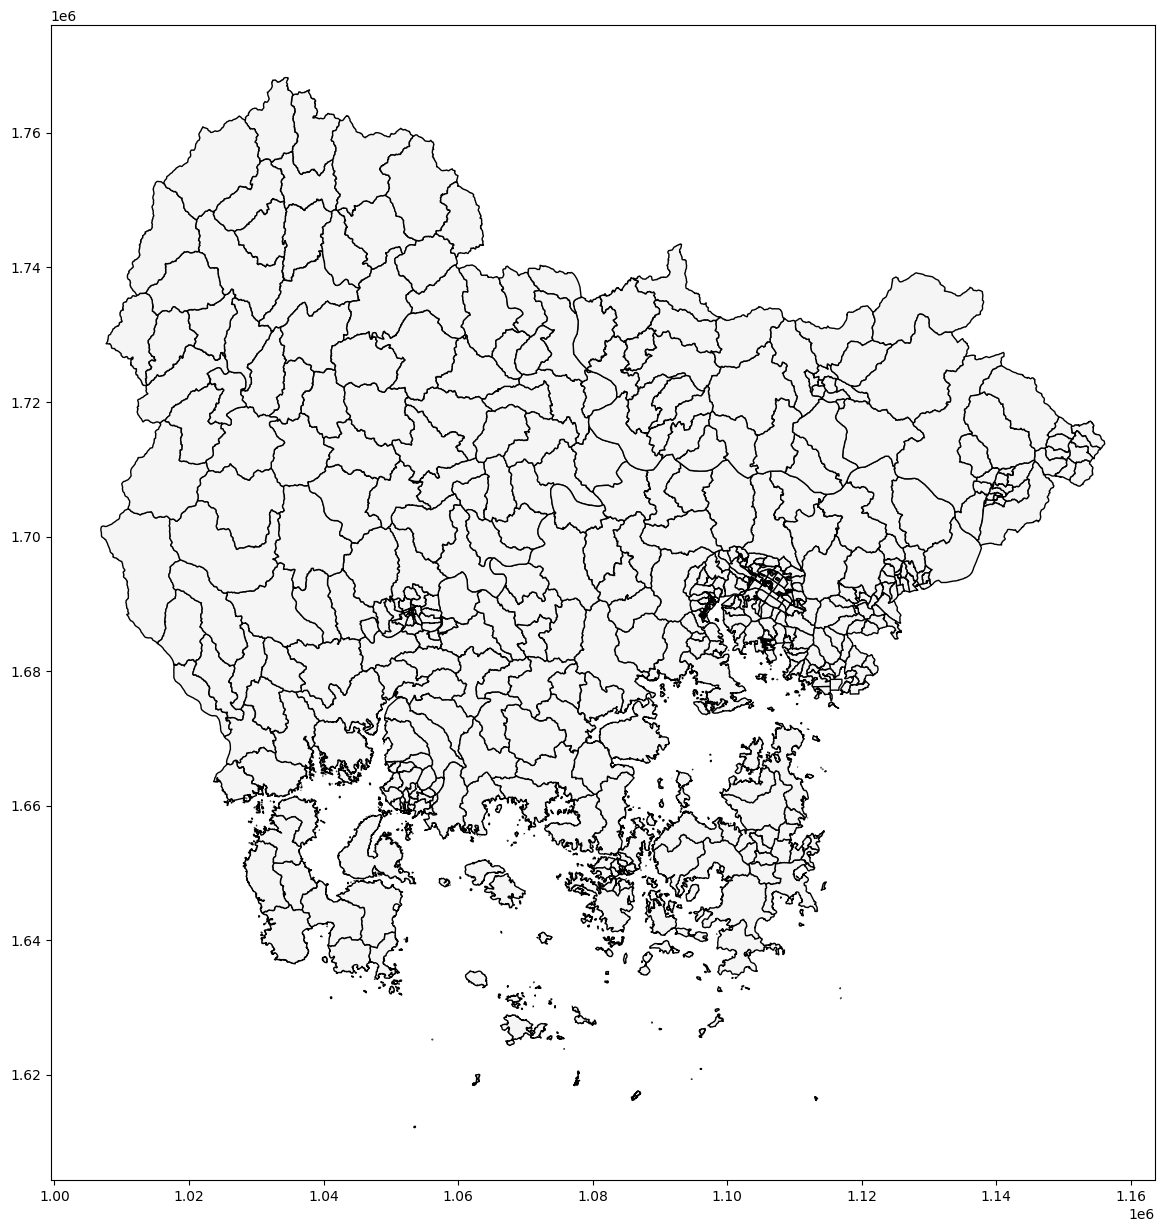

In [7]:
norm = Normalize(vmin=merged_gdf['val'].min(), vmax=merged_gdf['val'].max())
ax = emd_geo.plot(
    figsize = (20, 15), 
    color = "whitesmoke", 
    edgecolor = "black", 
    linewidth = 1,
    column = "EMD_KOR_NM",
    legend = True, 
    categorical = True
)
merged_gdf.plot(
    ax=ax,
    figsize = (20, 15), 
    color = "red",
    alpha = norm(merged_gdf['val']),
    edgecolor = "red", 
    linewidth = 1,
    column = "EMD_KOR_NM",
    legend = True, 
    categorical = True
)

plt.show()
